# Повторение некоторых семинарских тем

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.weightstats import _zconfint_generic
from statsmodels.stats.weightstats import ztest

%matplotlib inline

## Python
Вам дан словарь типичного программиста. На вход поступает строка `sequence` с разделёнными пробелами словами.

Необходимо вывести то же самое предложение, но "перевести" слова, которые есть в словаре. Если перевода в словаре нет, вывести исходное слово.

Спойлер: чтобы проверить, что в некотором объекте присутствует элемент, можно воспользоваться оператором `in`.

In [9]:
geek_dict = {
    'bug': 'mistake',
    'debug': 'find a mistake',
    'deep': 'learning',
    'monty': 'python',
    'jimmy': 'newbie'
}

# оператор in позволяет узнать, есть ли слово в словаре
some_word = 'circus'
if some_word in geek_dict:
    print(some_word + ' is in dict.')
else:
    print(some_word + ' is not in dict!')

circus is not in dict!


In [10]:
sequence = 'monty worked hard all night and found a bug'

# YOUR CODE
# превращаем строку с предложением в список слов
words = sequence.split()
# цикл по списку слов
for w in words:  # w = 'monty'
    # проверка, лежит ли слово в словаре
    if w in geek_dict:
    # print перевод слова или само слово
        print(geek_dict[w], end=' ')
    else:
        print(w, end=' ')

python worked hard all night and found a mistake 

## Статистика и визуализация
Будем анализировать [данные](https://www.kaggle.com/kaggle/kaggle-survey-2017) за 2017 год о зарплатах людей с карьерой в Data Science. Таблица заранее предобработана, из неё удалены неинтересные для нам столбцы, а все зарплаты переведены в USD.


Таблица лежит в файле `ds_salary.csv` и содержит ответы людей из разных страны на вопросы про работу / зарплату / образование:

In [11]:
data = pd.read_csv('ds_salary.csv')
data.head()

,GenderSelect,Country,Age,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,MLSkillsSelect,EmployerIndustry,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,JobSatisfaction,CompensationUSD
0,Male,United States,56.0,Operations Research Practitioner,Python,Master's degree,"Recommendation Engines,Reinforcement learning,...",Mix of fields,50.0,20.0,0.0,10.0,20.0,0.0,10.0,250000.0
1,Female,Australia,43.0,Business Analyst,Python,Bachelor's degree,Supervised Machine Learning (Tabular Data),Non-profit,60.0,10.0,5.0,15.0,10.0,0.0,7.0,64184.8
2,Male,Russia,33.0,Software Developer/Software Engineer,Python,Bachelor's degree,"Supervised Machine Learning (Tabular Data),Tim...",Internet-based,40.0,30.0,15.0,10.0,5.0,0.0,7.0,20882.4
3,Male,India,27.0,Data Scientist,Python,Bachelor's degree,"Computer Vision,Natural Language Processing,Re...",Mix of fields,30.0,20.0,10.0,10.0,30.0,0.0,7.0,1483.9
4,Male,Taiwan,26.0,Software Developer/Software Engineer,Python,Master's degree,Supervised Machine Learning (Tabular Data),Financial,35.0,20.0,25.0,10.0,10.0,0.0,5.0,36634.4


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GenderSelect                  4368 non-null   object 
 1   Country                       4366 non-null   object 
 2   Age                           4346 non-null   float64
 3   CurrentJobTitleSelect         4372 non-null   object 
 4   LanguageRecommendationSelect  4271 non-null   object 
 5   FormalEducation               4372 non-null   object 
 6   MLSkillsSelect                4200 non-null   object 
 7   EmployerIndustry              4369 non-null   object 
 8   TimeGatheringData             4373 non-null   float64
 9   TimeModelBuilding             4371 non-null   float64
 10  TimeProduction                4364 non-null   float64
 11  TimeVisualizing               4371 non-null   float64
 12  TimeFindingInsights           4369 non-null   float64
 13  Tim

Выведем количество данных по каждой стране:

In [13]:
data.Country.value_counts()

United States     1223
India              498
Other              228
United Kingdom     168
Russia             156
Germany            147
France             143
Brazil             138
Canada             118
Spain              111
Australia          110
China               86
Japan               81
Italy               75
Netherlands         73
Taiwan              58
Poland              54
Mexico              51
South Africa        49
Singapore           49
Ukraine             45
Switzerland         45
Colombia            44
Pakistan            35
Belgium             33
Turkey              31
Israel              30
Finland             29
Ireland             28
Denmark             28
Argentina           27
Portugal            27
South Korea         26
Sweden              26
Indonesia           26
Philippines         25
Iran                23
Greece              23
Czech Republic      21
Chile               21
Nigeria             19
Hungary             18
New Zealand         18
Hong Kong  

Видим, что данных по разным странам довольно много, но некоторым почти совсем нет. Когда данных мало, сложно что-то надёжно предсказывать.
Удалите из таблицы страны, по которым меньше 20 ответов.

In [14]:
# YOUR CODE
data_vc = data.Country.value_counts()
data = data[data.Country.isin(data_vc[data_vc > 20].index)]
data.head()

,GenderSelect,Country,Age,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,MLSkillsSelect,EmployerIndustry,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,JobSatisfaction,CompensationUSD
0,Male,United States,56.0,Operations Research Practitioner,Python,Master's degree,"Recommendation Engines,Reinforcement learning,...",Mix of fields,50.0,20.0,0.0,10.0,20.0,0.0,10.0,250000.0
1,Female,Australia,43.0,Business Analyst,Python,Bachelor's degree,Supervised Machine Learning (Tabular Data),Non-profit,60.0,10.0,5.0,15.0,10.0,0.0,7.0,64184.8
2,Male,Russia,33.0,Software Developer/Software Engineer,Python,Bachelor's degree,"Supervised Machine Learning (Tabular Data),Tim...",Internet-based,40.0,30.0,15.0,10.0,5.0,0.0,7.0,20882.4
3,Male,India,27.0,Data Scientist,Python,Bachelor's degree,"Computer Vision,Natural Language Processing,Re...",Mix of fields,30.0,20.0,10.0,10.0,30.0,0.0,7.0,1483.9
4,Male,Taiwan,26.0,Software Developer/Software Engineer,Python,Master's degree,Supervised Machine Learning (Tabular Data),Financial,35.0,20.0,25.0,10.0,10.0,0.0,5.0,36634.4


Заменим столбцы с перечислением навыков человека на количество навыков, которые он указал:

In [15]:
'R,A,B,C'.split(',')

['R', 'A', 'B', 'C']

In [16]:
data['SkillsCount'] = data.MLSkillsSelect.fillna('').apply(lambda x: len(x.split(',')))
data.drop('MLSkillsSelect', axis=1, inplace=True)
data.head()

,GenderSelect,Country,Age,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,EmployerIndustry,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,JobSatisfaction,CompensationUSD,SkillsCount
0,Male,United States,56.0,Operations Research Practitioner,Python,Master's degree,Mix of fields,50.0,20.0,0.0,10.0,20.0,0.0,10.0,250000.0,6
1,Female,Australia,43.0,Business Analyst,Python,Bachelor's degree,Non-profit,60.0,10.0,5.0,15.0,10.0,0.0,7.0,64184.8,1
2,Male,Russia,33.0,Software Developer/Software Engineer,Python,Bachelor's degree,Internet-based,40.0,30.0,15.0,10.0,5.0,0.0,7.0,20882.4,3
3,Male,India,27.0,Data Scientist,Python,Bachelor's degree,Mix of fields,30.0,20.0,10.0,10.0,30.0,0.0,7.0,1483.9,6
4,Male,Taiwan,26.0,Software Developer/Software Engineer,Python,Master's degree,Financial,35.0,20.0,25.0,10.0,10.0,0.0,5.0,36634.4,1


Заменим `Male` на 1, а `Female` на 0:

In [17]:
data['MaleDummy'] = 0
data.loc[data.GenderSelect == 'Male', 'MaleDummy'] = 1
data.drop('GenderSelect', axis=1, inplace=True)
data.head()

,Country,Age,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,EmployerIndustry,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,JobSatisfaction,CompensationUSD,SkillsCount,MaleDummy
0,United States,56.0,Operations Research Practitioner,Python,Master's degree,Mix of fields,50.0,20.0,0.0,10.0,20.0,0.0,10.0,250000.0,6,1
1,Australia,43.0,Business Analyst,Python,Bachelor's degree,Non-profit,60.0,10.0,5.0,15.0,10.0,0.0,7.0,64184.8,1,0
2,Russia,33.0,Software Developer/Software Engineer,Python,Bachelor's degree,Internet-based,40.0,30.0,15.0,10.0,5.0,0.0,7.0,20882.4,3,1
3,India,27.0,Data Scientist,Python,Bachelor's degree,Mix of fields,30.0,20.0,10.0,10.0,30.0,0.0,7.0,1483.9,6,1
4,Taiwan,26.0,Software Developer/Software Engineer,Python,Master's degree,Financial,35.0,20.0,25.0,10.0,10.0,0.0,5.0,36634.4,1,1


In [18]:
numerical_columns = [
    'Age',
    'TimeGatheringData',
    'TimeModelBuilding',
    'TimeProduction',
    'TimeVisualizing',
    'TimeFindingInsights',
    'TimeOtherSelect',
    'JobSatisfaction',
    'SkillsCount',
    'MaleDummy',
    'CompensationUSD'
]

Заполните пропуски в числовых столбцах медианой.

In [19]:
# YOUR CODE
for col in numerical_columns:
    med = data[col].median()
    data[col].fillna(med, inplace=True)

Заполните пропуски в остальных столбцах модой.

In [20]:
# YOUR CODE
for col in data.columns:
    if col not in numerical_columns:
        mod = data[col].mode()
        data[col].fillna(mod, inplace=True)

Постройте боксплот по возрасту для разных стран.

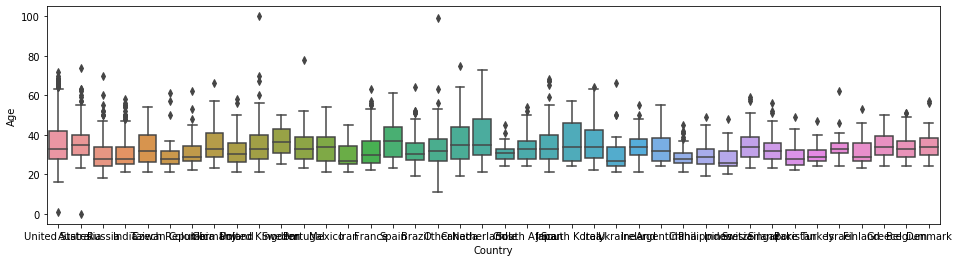

In [21]:
# YOUR CODE
plt.figure(figsize=(16, 4))
sns.boxplot('Country', 'Age', data=data)

Названия стран довольно длинные, поэтому надписи вдоль Ox "склеятся". По нагугленной [ссылке](https://stackoverflow.com/a/44954327) есть решение, как с этим справиться, реализуйте его.

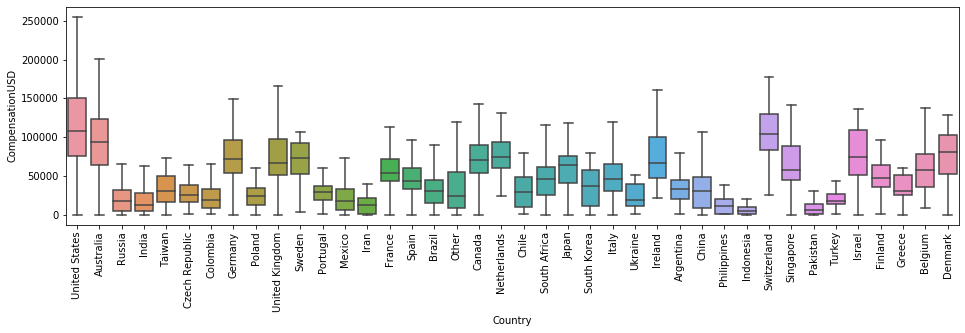

In [22]:
# YOUR CODE
plt.figure(figsize=(16, 4))
ax = sns.boxplot('Country', 'CompensationUSD', data=data, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Люди, указавшие в возрасте меньше 10 или больше 90 лет -- это выбросы в данных, удалите их из таблицы.

In [23]:
# YOUR CODE
data = data[(data.Age > 10) & (data.Age < 90)]

Люди, указавшие зарплату меньше 0 или больше 300k -- это выбросы в данных, удалите их из таблицы.

In [24]:
# YOUR CODE
data = data[(data.CompensationUSD > 0) & (data.CompensationUSD < 300000)]

Выведите основные статистики по зарплате `CompensationUSD` (метод `describe`) для каждого уровня образования `FormalEducation`. Различается ли доход у людей с разным уровнем образования?

In [25]:
# YOUR CODE
# делаем groupby по FormalEducation
# вытаскиваем нужный столбец с зарплатой
# вызываем describe
data.groupby('FormalEducation').CompensationUSD.describe()

,count,mean,std,min,25%,50%,75%,max
FormalEducation,,,,,,,,
Bachelor's degree,1026.0,53700.305115,49826.543230,0.158813,12153.6696,40000.00,82375.0000,250000.0
Doctoral degree,931.0,84320.579851,58006.888817,2.797536,41853.9100,74258.90,120000.0000,299000.0
I did not complete any formal education past high school,25.0,66814.514720,58101.777442,11.120000,27324.0000,45000.00,95666.0800,179373.9
I prefer not to answer,6.0,83352.461667,51406.827045,36720.000000,52500.0000,71853.91,88192.1675,180000.0
Master's degree,1898.0,63764.806526,51273.555704,0.060000,23430.0000,53812.17,92000.0000,298956.5
Professional degree,127.0,55400.227640,48256.978243,11.247250,17292.0000,40000.00,84127.0500,230000.0
Some college/university study without earning a bachelor's degree,105.0,60132.078542,56839.728885,4.454912,12339.8400,40986.00,106000.0000,200000.0


Построим сводную горизонтальную столбчатую диаграмму, описывающую, какие языки используются на какой должности.

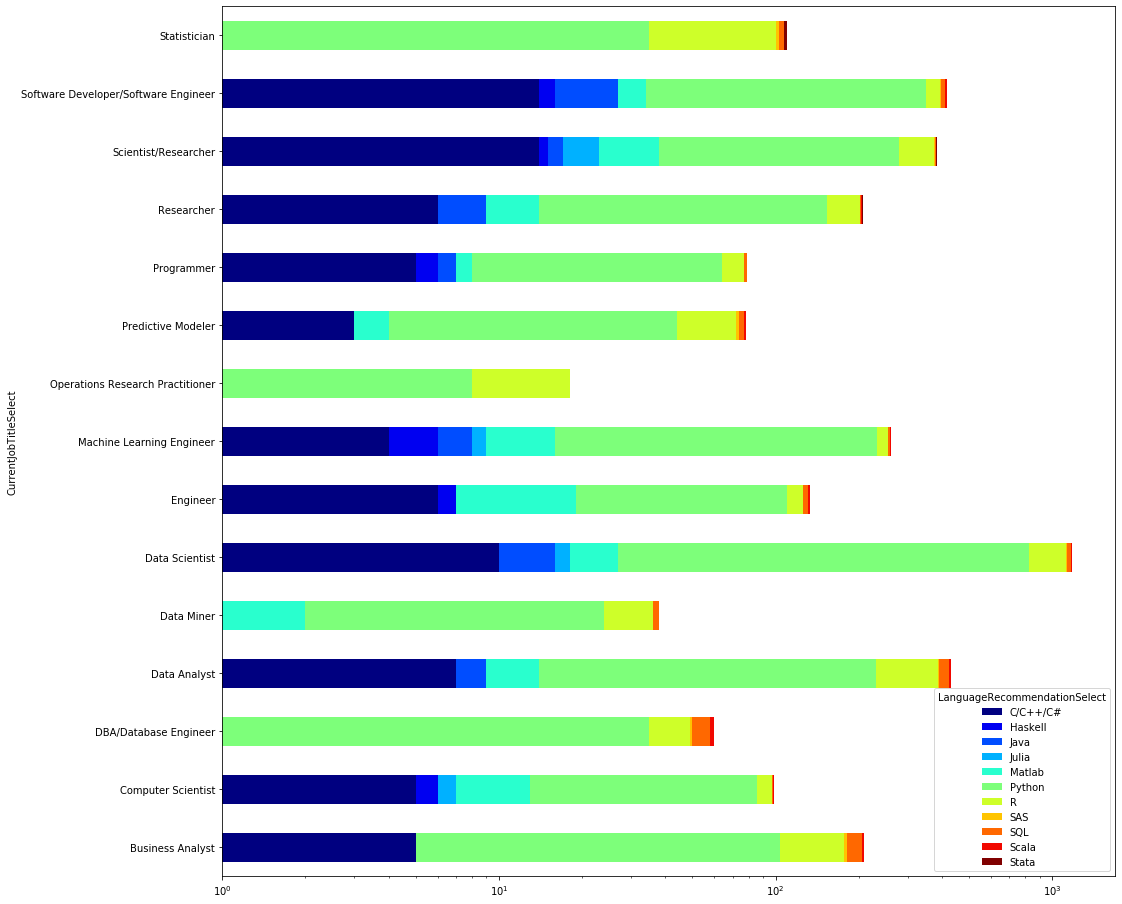

In [26]:
pivoted_data = data[(data.CurrentJobTitleSelect != 'Other') & (data.LanguageRecommendationSelect != 'Other')].pivot_table(
    # 1. здесь мог быть любой другой столбец, по нему просто считаются непустые ячейки
    'CompensationUSD',
    # 2. столбец для groupby
    'CurrentJobTitleSelect',
    # 3. столбец для groupby
    'LanguageRecommendationSelect',
    # хотим посчитать непустые ячейки в столбце 1,
    # чтобы увидеть количество ответов для каждой комбинации значений столбцов 2 и 3
    aggfunc='count'
)
pivoted_data.plot(kind='barh', stacked=True, figsize=(16, 16), logx=True, colormap='jet')

## Sklearn fit-predict
Давайте попробуем предсказывать для каждого человека его зарплату, обладая текущей информацией. Сначала надо подготовить данные.

In [27]:
numerical_columns

['Age',
 'TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect',
 'JobSatisfaction',
 'SkillsCount',
 'MaleDummy',
 'CompensationUSD']

In [28]:
categorical_columns = [
    'Country',
    'LanguageRecommendationSelect',
    'FormalEducation',
]
feature_columns = categorical_columns + numerical_columns
target_column = 'CompensationUSD'
feature_columns = [col for col in feature_columns if col != target_column]

In [29]:
feature_columns

['Country',
 'LanguageRecommendationSelect',
 'FormalEducation',
 'Age',
 'TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect',
 'JobSatisfaction',
 'SkillsCount',
 'MaleDummy']

In [30]:
target_column

'CompensationUSD'

Закодируем категориальные переменные с помощью OHE:

In [31]:
data_with_dummies = pd.get_dummies(data[feature_columns + [target_column]], columns=categorical_columns)
data_with_dummies.head()

,Age,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,JobSatisfaction,SkillsCount,MaleDummy,...,LanguageRecommendationSelect_SQL,LanguageRecommendationSelect_Scala,LanguageRecommendationSelect_Stata,FormalEducation_Bachelor's degree,FormalEducation_Doctoral degree,FormalEducation_I did not complete any formal education past high school,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Professional degree,FormalEducation_Some college/university study without earning a bachelor's degree
0,56.0,50.0,20.0,0.0,10.0,20.0,0.0,10.0,6,1,...,0,0,0,0,0,0,0,1,0,0
1,43.0,60.0,10.0,5.0,15.0,10.0,0.0,7.0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,33.0,40.0,30.0,15.0,10.0,5.0,0.0,7.0,3,1,...,0,0,0,1,0,0,0,0,0,0
3,27.0,30.0,20.0,10.0,10.0,30.0,0.0,7.0,6,1,...,0,0,0,1,0,0,0,0,0,0
4,26.0,35.0,20.0,25.0,10.0,10.0,0.0,5.0,1,1,...,0,0,0,0,0,0,0,1,0,0


Проведём нормализацию числовых признаков (и целевой переменной) с помощью преобразования
$$
X = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

In [32]:
scl = MinMaxScaler()

data_with_dummies[numerical_columns] = scl.fit_transform(data_with_dummies[numerical_columns])

In [33]:
data_with_dummies.CompensationUSD

0       0.836120
1       0.214665
2       0.069841
3       0.004963
4       0.122523
          ...   
4367    0.219968
4368    0.167224
4369    0.335951
4370    0.668896
4372    0.033445
Name: CompensationUSD, Length: 4119, dtype: float64

Разобьём данные на train и test:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_with_dummies.drop(target_column, axis=1), data_with_dummies[target_column])

In [35]:
X_train.shape, X_test.shape

((3089, 69), (1030, 69))

Обучите модель линейной регрессии, посчитайте MAE и MSE.

In [36]:
# YOUR CODE
regr = Ridge()  # Linear regression + w**2 < 1

regr.fit(X_train, y_train)

pred = regr.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred) ** 0.5)

0.0905890653966721
0.13174051218439817


In [37]:
0.086 * 250000

21500.0

Постройте гистограмму ошибок между реальными тестовыми значениями и предсказанными. Какие ошибки модель совершает чаще: завышает или, наоборот, занижает з/п? Чтобы гистограмма была нагляднее, можно "отрезать хвосты": отобразить только ошибки, попадающие в промежуток между квантилями 0.01 и 0.99, например.

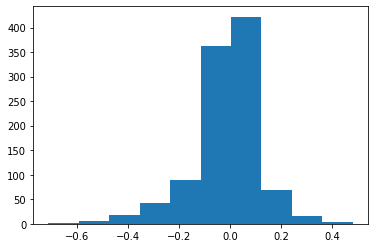

In [38]:
# YOUR CODE
errors = pred - y_test
plt.hist(errors);

Выведем коэффициенты регрессии для числовых признаков:

In [39]:
featureImportance = pd.DataFrame({"feature": list(X_train.columns),  "importance": regr.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance

,importance
feature,
Age,0.313467
Country_United States,0.184259
Country_Australia,0.157213
Country_Switzerland,0.145831
SkillsCount,0.133896
...,...
Country_Mexico,-0.081957
Country_Pakistan,-0.082770
Country_Colombia,-0.087162


In [40]:
featureImportance.head(20)

,importance
feature,
Age,0.313467
Country_United States,0.184259
Country_Australia,0.157213
Country_Switzerland,0.145831
SkillsCount,0.133896
Country_Israel,0.100531
Country_Denmark,0.094340
Country_Ireland,0.079712
Country_Netherlands,0.072024


In [41]:
featureImportance.tail(20)

,importance
feature,
Country_Czech Republic,-0.038486
Country_Taiwan,-0.038813
Country_Argentina,-0.043991
Country_Greece,-0.049111
Country_Brazil,-0.049159
LanguageRecommendationSelect_Stata,-0.051961
Country_Chile,-0.054609
Country_Turkey,-0.057678
Country_Poland,-0.063222


## Проверка гипотез
Проверим гипотезу, что для разных должностей зарплаты в среднем одинаковые.

Псостроим боксплот по зарплате `CompensationUSD` для каждой должности:

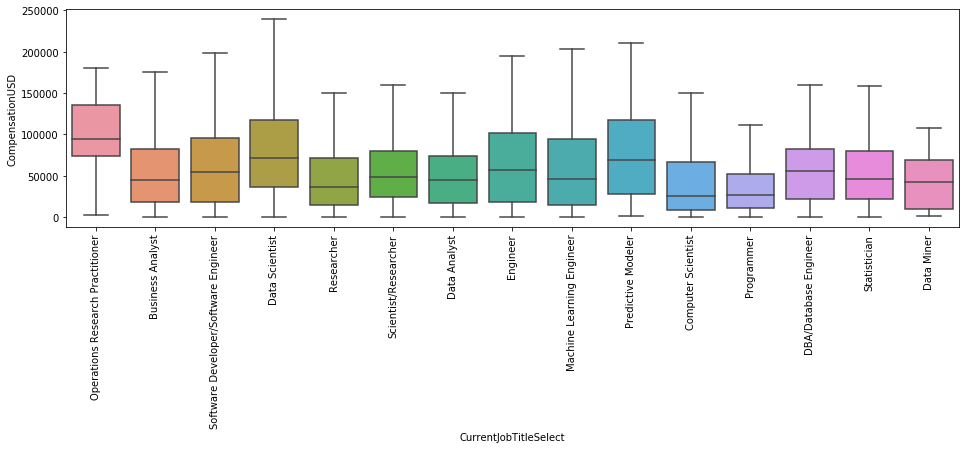

In [42]:
plt.figure(figsize=(16, 4))
ax = sns.boxplot('CurrentJobTitleSelect', 'CompensationUSD', data=data[data.CurrentJobTitleSelect != 'Other'], showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Выглядит так, будто у `Operations Research Practitioner` зарплата в среднем выше, чем у `Data Scientist`. Проверим, значима ли эта разница. Выведем среднее значение для обеих должностей:

In [43]:
title_0 = 'Operations Research Practitioner'
title_1 = 'Data Scientist'

print('Mean wage for', title_0, data[data.CurrentJobTitleSelect == title_0].CompensationUSD.mean())
print('Mean wage for', title_1, data[data.CurrentJobTitleSelect == title_1].CompensationUSD.mean())

Mean wage for Operations Research Practitioner 102924.89111111111
Mean wage for Data Scientist 80458.01167227472


Будем проверять гипотезу $H_0: \mu_{DS} = 102924$. Т.е. предполагаем, что "настоящая" средняя з/п у датасайентистов 102924 и хотим проверить, насколько это предположение разумно, обладая нашей выборкой зарплат.

In [44]:
mu = data[data.CurrentJobTitleSelect == title_0].CompensationUSD.mean()

data_1 = data[data.CurrentJobTitleSelect == title_1]
mean = data_1.CompensationUSD.mean()
std = data_1.CompensationUSD.std()
n = len(data_1)

Нормальный интервал (попадает ли 0? если да, гипотеза не отвергается):

In [45]:
_zconfint_generic(mean - mu,  std / np.sqrt(n), 0.05, 'two-sided')

(-25636.757717947607, -19297.001159725172)

T-тест (если p-value больше 0.05, наша гипотеза вполне может быть правдой, т.е. не отвергается):

In [46]:
ztest(data_1.CompensationUSD, value=mu)

(-13.891471743662454, 7.135393749872034e-44)

Теперь можно поменять выше названия должностей и проверить то же самое для других, например, `Computer Scientist` и `Programmer`.

Сравнение зарплат для мужчин и женщин:

In [47]:
data_with_dummies.MaleDummy.value_counts()

1.0    3522
0.0     597
Name: MaleDummy, dtype: int64

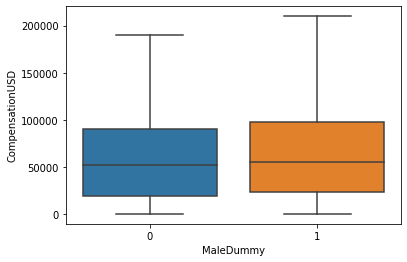

In [48]:
sns.boxplot('MaleDummy', 'CompensationUSD', data=data, showfliers=False)

In [49]:
title_0 = 0
title_1 = 1

print('Mean wage for', title_0, data[data.MaleDummy == title_0].CompensationUSD.mean())
print('Mean wage for', title_1, data[data.MaleDummy == title_1].CompensationUSD.mean())

Mean wage for 0 62451.800509557754
Mean wage for 1 66129.7156746999


In [50]:
mu = data[data.MaleDummy == title_0].CompensationUSD.mean()

data_1 = data[data.MaleDummy == title_1]
mean = data_1.CompensationUSD.mean()
std = data_1.CompensationUSD.std()
n = len(data_1)

In [51]:
mu, mean

(62451.800509557754, 66129.7156746999)

Нормальный интервал (попадает ли 0? если да, гипотеза не отвергается):

In [52]:
_zconfint_generic(mean - mu,  std / np.sqrt(n), 0.05, 'two-sided')

(1896.7348772790172, 5459.095453005266)

T-тест (если p-value больше 0.05, наша гипотеза вполне может быть правдой, т.е. не отвергается):

In [53]:
ztest(data_1.CompensationUSD, value=mu)

(4.047081202835656, 5.186025436157575e-05)